In [171]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 

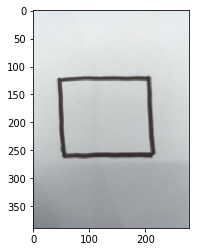

(389, 279, 3)


In [172]:
im = cv2.imread("images/box.jpg")
scale_percent = 10 # percent of original size
width = int(im.shape[1] * scale_percent / 100)
height = int(im.shape[0] * scale_percent / 100)
dim = (width, height)
im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
imgplot = plt.imshow(im)
plt.show()

print(im.shape)

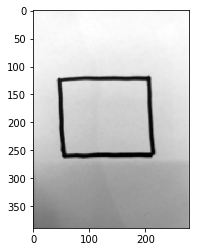

In [173]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# im_gray = cv2.imread("box.jpg", cv2.IMREAD_GRAYSCALE)
imgplot = plt.imshow(im_gray, cmap=plt.cm.gray)
plt.show()

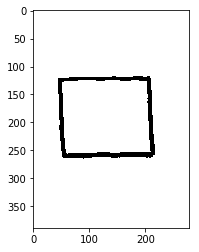

In [174]:
thresh = 127
im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]
imgplot = plt.imshow(im_bw, cmap=plt.cm.gray)
plt.show()

In [175]:
print(im.shape)
print(im_gray.shape)
print(im_bw.shape)

(389, 279, 3)
(389, 279)
(389, 279)


In [176]:
print(np.max(im), np.min(im))
print(np.max(im_gray), np.min(im_gray))
print(np.max(im_bw), np.min(im_bw))

242 44
239 47
255 0


# Image Processing

In [177]:
gray = cv2.medianBlur(im_gray, 3)

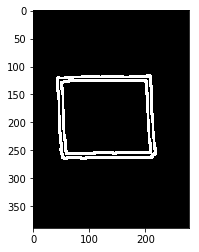

In [178]:
edges = cv2.Canny(gray,100,200)

#dilation
kernel = np.ones((5, 5), np.uint8)
# Creating the kernel for dilation
dilated_image = cv2.dilate(edges,kernel,iterations=1)

plt.imshow(dilated_image,cmap = 'gray')
plt.show()

4


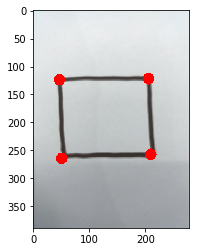

In [179]:
corners = cv2.goodFeaturesToTrack(dilated_image,4,0.06,25)
corners = np.float32(corners)
print(len(corners))
for corner in corners:
    x,y = corner[0]
    cv2.circle(im,(x,y),10,255,-1)

plt.imshow(im,cmap = 'gray')
plt.show()

In [181]:
print(corners)

[[[210. 257.]]

 [[ 47. 124.]]

 [[ 51. 264.]]

 [[206. 122.]]]
